<a href="https://colab.research.google.com/github/shadab4150/Deep-Learning-Classifiers/blob/master/comparing_activation_function_ReLU_vs_Mish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>6 Different types of Activation function</h1></center>

In [0]:
from numpy import exp,log,tanh,linspace,sin,float_power
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_style('whitegrid')

In [0]:
def mish(x):
    act = x*tanh(log(1+exp(x)))
    return act   
def relu(x):
    return max(0,x)
def sigmoid(x):
    sg = 1/(1+exp(-x))
    return sg
def swish(x):
    return x*sigmoid(x)
def leakyRelu(x):
    return max(0.1*x,x)
    

In [0]:
x = linspace(-10,10,10000)
y = mish(x)
y1 = sigmoid(x)
y2 = [relu(i) for i in x]
y4 = tanh(x)
y5 = swish(x)
y6 = [leakyRelu(i) for i in x]

<center><h1>Plotting 6 Different types of Activation function</h1></center>

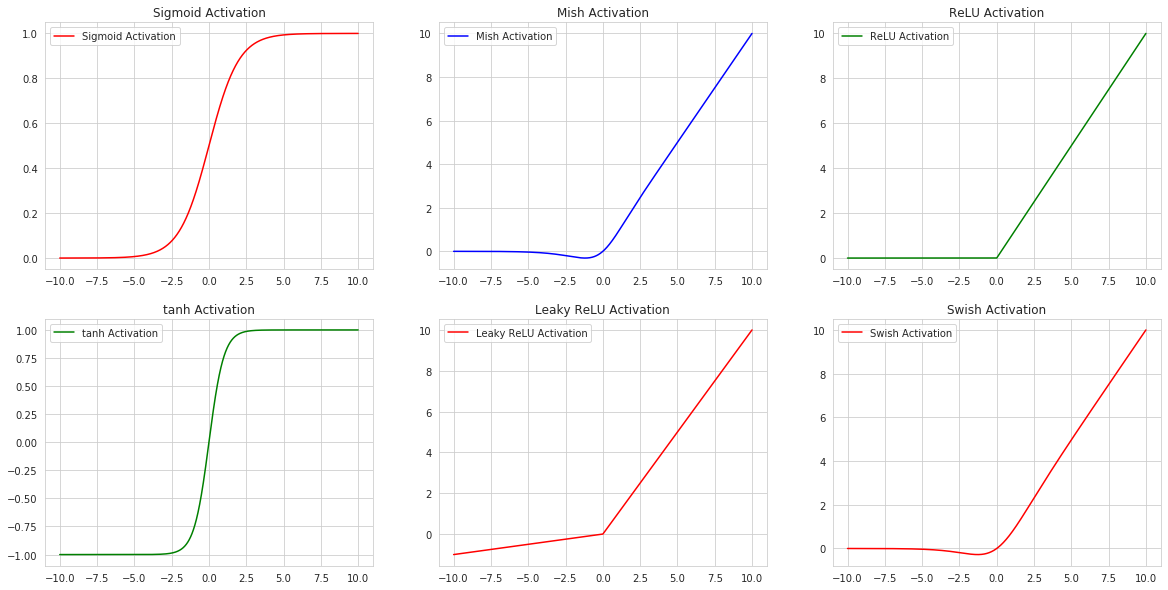

In [0]:
plt.figure(1,figsize=(20,10))
plt.subplot(231)
sns.lineplot(x=x,y=y1,color='red',label='Sigmoid Activation')
plt.title('Sigmoid Activation')
plt.subplot(232)
sns.lineplot(x=x,y=y,color='blue',label='Mish Activation')
#sns.lineplot(x=x,y=y5,color='red',label='Swish Activation')
plt.title('Mish Activation')
plt.subplot(233)
sns.lineplot(x=x,y=y2,color='green',label='ReLU Activation')
plt.title('ReLU Activation')
plt.subplot(234)
sns.lineplot(x=x,y=y4,color='green',label='tanh Activation')
plt.title('tanh Activation')
plt.subplot(236)
sns.lineplot(x=x,y=y5,color='red',label='Swish Activation')
#sns.lineplot(x=x,y=y,color='blue',label='Mish Activation')
plt.title('Swish Activation')
plt.subplot(235)
sns.lineplot(x=x,y=y6,color='red',label='Leaky ReLU Activation')
plt.title('Leaky ReLU Activation')
plt.savefig('act.png')
plt.show()

## Comparing Time of each activation function per 100k loops

In [48]:
%%timeit
mish(0.9343)

The slowest run took 26.76 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.45 µs per loop


In [49]:
%%timeit
relu(0.9343)

The slowest run took 10.83 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 243 ns per loop


In [50]:
%%timeit
swish(0.9343)

The slowest run took 21.55 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 1.89 µs per loop


In [51]:
%%timeit
sigmoid(0.9343)

The slowest run took 12.68 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.75 µs per loop


In [0]:
m = float_power(10,-6)
n = float_power(10,-9)
a1 = [4.45*m,243*n,1.89*m,1.75*m]
b1 = ['Mish','ReLU','Swish','Sigmoid']
s = ['4.45 µs ','243 ns ','1.89 µs ','1.89 µs ']

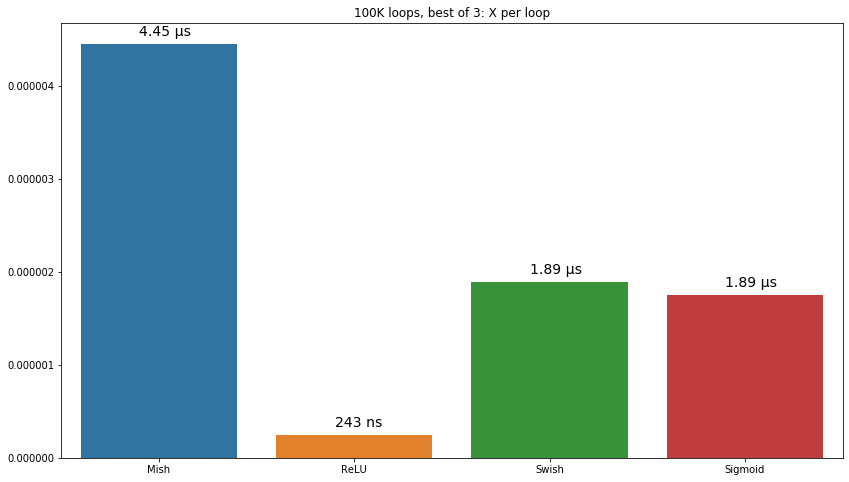

In [57]:
plt.figure(1,figsize=(14,8))
sns.barplot(y=a1,x=b1)
plt.title("100K loops, best of 3: X per loop");
for i in range(4):
  plt.text(x =i-0.1 , y = a1[i]+0.00000009, s =s[i], size = 14)
plt.show()

# Lets build a model to see the difference

In [0]:
import cv2
from tqdm import tqdm_notebook as tqdm
import zipfile
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [0]:
!unzip '/content/train.zip' -d '/content/mnist/'

In [0]:
from fastai.vision import *

In [0]:
label = pd.read_csv('/content/label_digit.csv')

In [0]:
label.digit = label.digit.replace(dic)

In [0]:
path = Path('/content/')

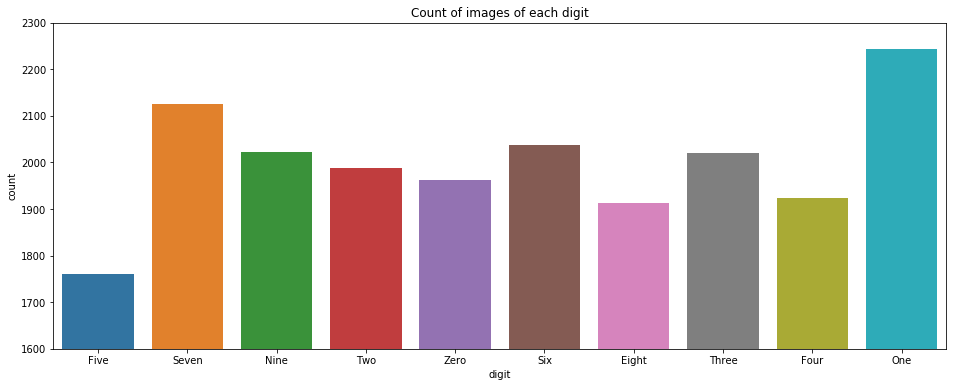

In [0]:
plt.figure(1,figsize=(16,6))
sns.countplot(x=label.digit)
plt.title('Count of images of each digit')
plt.ylim(1600,2300);

In [0]:
stats = ([0.8693],[0.3082])
data = (ImageList.from_df(label,path=path,folder='mnist',suffix='.png',cols='image_id')
                .split_by_rand_pct(0.2,seed=64)
                .label_from_df(cols='digit')
                .transform( size=28, padding_mode='zeros')
                .databunch(bs=128)).normalize(stats)

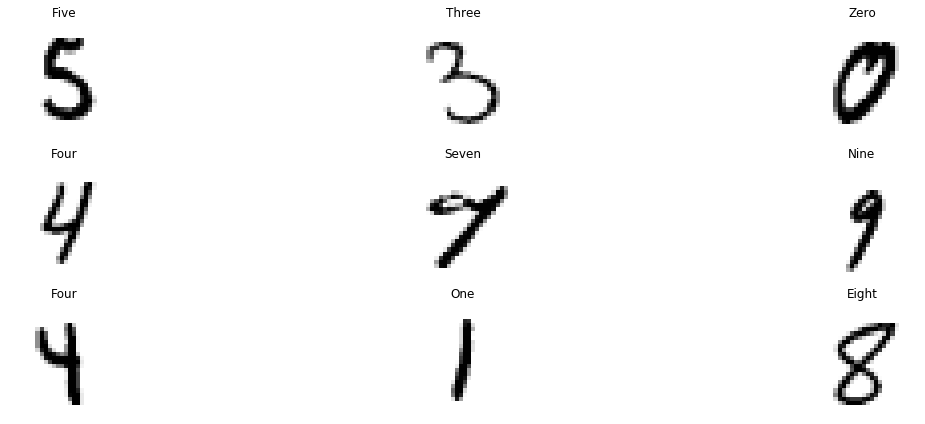

In [0]:
data.show_batch(rows=3,figsize=(20,6))

In [0]:
def conv2(ni,nf): 
  return conv_layer(ni,nf,stride=2)

class ResBlock(nn.Module):
  def __init__(self, nf):
    super().__init__()
    self.conv1 = conv_layer(nf,nf)
    self.conv2 = conv_layer(nf,nf)
  def forward(self, x): 
    return x + self.conv2(self.conv1(x))



# ni = number of channels in 
# nf = number of channels out
def conv_and_res(ni,nf): 
	return nn.Sequential(conv2(ni, nf), res_block(nf))

## Model wit ReLU activation function

In [0]:

modelRelu = nn.Sequential(  # model with res block
    conv_and_res(3, 8),nn.BatchNorm2d(8),nn.ReLU(),nn.Dropout(0.3),
    conv_and_res(8, 16),nn.BatchNorm2d(16),nn.ReLU(),nn.Dropout(0.4),
    conv_and_res(16, 32),nn.BatchNorm2d(32),nn.ReLU(),nn.Dropout(0.3),
    conv_and_res(32, 16),nn.BatchNorm2d(16),nn.ReLU(),nn.Dropout(0.2),
    conv2(16, 10),
    Flatten()
)

modelRelu1 = nn.Sequential(
    nn.Conv2d(3, 8,kernel_size=3,stride=2,padding=1),nn.BatchNorm2d(8),nn.ReLU(),nn.Dropout(0.3),
    nn.Conv2d(8, 16,kernel_size=3,stride=2,padding=1),nn.BatchNorm2d(16),nn.ReLU(),nn.Dropout(0.4),
    nn.Conv2d(16, 32,kernel_size=3,stride=2,padding=1),nn.BatchNorm2d(32),nn.ReLU(),nn.Dropout(0.3),
    nn.Conv2d(32, 16,kernel_size=3,stride=2,padding=1),nn.BatchNorm2d(16),nn.ReLU(),nn.Dropout(0.2),
    nn.Conv2d(16, 10,kernel_size=3,stride=2,padding=1),
    Flatten()
)

In [0]:
from mish_activation import *

## Model with Mish activation function

In [0]:

modelMish = nn.Sequential(
    nn.Conv2d(3, 8,kernel_size=3,stride=2,padding=1),nn.BatchNorm2d(8),Mish(),nn.Dropout(0.3),
    nn.Conv2d(8, 16,kernel_size=3,stride=2,padding=1),nn.BatchNorm2d(16),Mish(),nn.Dropout(0.4),
    nn.Conv2d(16, 32,kernel_size=3,stride=2,padding=1),nn.BatchNorm2d(32),Mish(),nn.Dropout(0.3),
    nn.Conv2d(32, 16,kernel_size=3,stride=2,padding=1),nn.BatchNorm2d(16),Mish(),nn.Dropout(0.2),
    nn.Conv2d(16, 10,kernel_size=3,stride=2,padding=1),
    Flatten()
)

In [0]:
!pip install torchviz

In [0]:
from graphviz import Digraph
import torch
from torch.autograd import Variable
from torchviz import make_dot

## Plotting model Parameters of Models with Mish and ReLU activation function

In [0]:
x = Variable(torch.rand(8, 3,3,3))

In [0]:
y = modelMish(x)

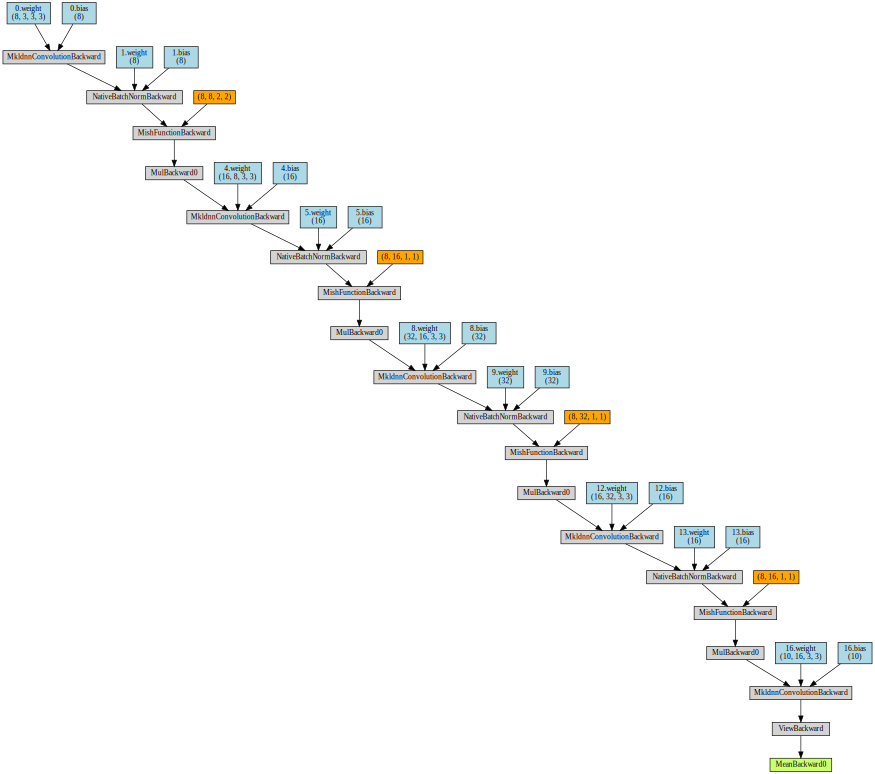

In [36]:
make_dot(y.mean(),params=dict(modelMish.named_parameters()))

In [0]:
yR= modelRelu1(x)

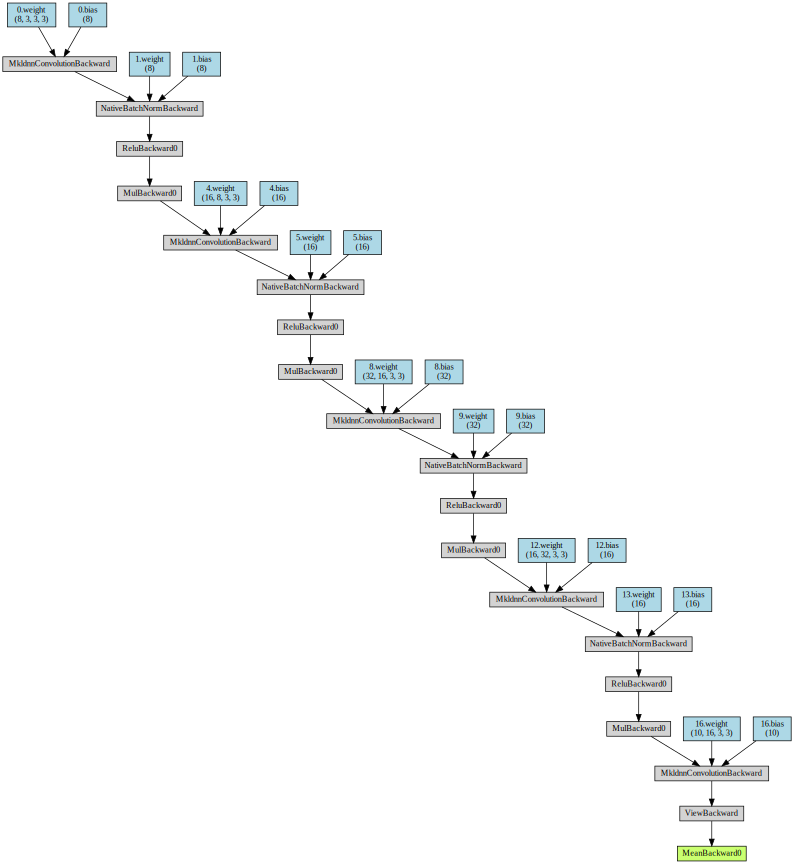

In [41]:
make_dot(yR.mean(),params=dict(modelRelu1.named_parameters()))

# Metrics f1_score

In [0]:
fb = FBeta()
fb.average='macro'

In [0]:
learnR = Learner(data, modelRelu1, loss_func = nn.CrossEntropyLoss(), metrics=[accuracy,fb]) # Relu activation function used
learnM = Learner(data, modelMish, loss_func = nn.CrossEntropyLoss(), metrics=[accuracy,fb]) # Mish activation function used

## ReLU activation model summary

In [0]:
learnR.model

Sequential(
  (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout(p=0.3, inplace=False)
  (4): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): Dropout(p=0.4, inplace=False)
  (8): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (9): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU()
  (11): Dropout(p=0.3, inplace=False)
  (12): Conv2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (13): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (14): ReLU()
  (15): Dropout(p=0.2, inplace=False)
  (16): Conv2d(16, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (17): Flatten()
)

In [0]:
learnR.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 14, 14]          224        True      
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
Dropout              [8, 14, 14]          0          False     
______________________________________________________________________
Conv2d               [16, 7, 7]           1,168      True      
______________________________________________________________________
BatchNorm2d          [16, 7, 7]           32         True      
______________________________________________________________________
ReLU                 [16, 7, 7]           0          False     
___________________________________________________

## Mish activation model summary

In [0]:
learnM.model

Sequential(
  (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Mish()
  (3): Dropout(p=0.3, inplace=False)
  (4): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Mish()
  (7): Dropout(p=0.4, inplace=False)
  (8): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (9): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): Mish()
  (11): Dropout(p=0.3, inplace=False)
  (12): Conv2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (13): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (14): Mish()
  (15): Dropout(p=0.2, inplace=False)
  (16): Conv2d(16, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (17): Flatten()
)

In [0]:
learnM.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 14, 14]          224        True      
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
Mish                 [8, 14, 14]          0          False     
______________________________________________________________________
Dropout              [8, 14, 14]          0          False     
______________________________________________________________________
Conv2d               [16, 7, 7]           1,168      True      
______________________________________________________________________
BatchNorm2d          [16, 7, 7]           32         True      
______________________________________________________________________
Mish                 [16, 7, 7]           0          False     
___________________________________________________

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


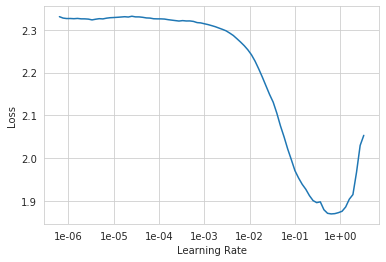

In [0]:
learnR.lr_find()
learnR.recorder.plot()

## Running Relu model for 6 epocs with
* learning rate = 1e-1
* epochs = 6

In [0]:
learnR.fit_one_cycle(6,1e-1,moms=(0.9,0.8))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.306970,0.139077,0.956989,0.956554,00:06
1,0.403808,0.160575,0.952488,0.952332,00:06
2,0.375956,0.129577,0.958490,0.958198,00:06
3,0.319296,0.124159,0.960740,0.960340,00:06
4,0.267700,0.097713,0.970993,0.970617,00:06
5,0.224968,0.093025,0.969742,0.969625,00:06


## Running Mish model for 6 epocs with
* learning rate = 1e-1
* epochs = 6

In [0]:
learnM.fit_one_cycle(6,1e-1,moms=(0.9,0.8))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.233864,0.181765,0.945486,0.944627,00:06
1,0.335340,0.146557,0.957239,0.956919,00:06
2,0.297076,0.133390,0.957489,0.957596,00:06
3,0.246962,0.104779,0.966492,0.966677,00:06
4,0.196048,0.084462,0.973243,0.973068,00:06
5,0.161266,0.080019,0.973743,0.973560,00:06


In [0]:
interpR = ClassificationInterpretation.from_learner(learnR)
interpM = ClassificationInterpretation.from_learner(learnM)

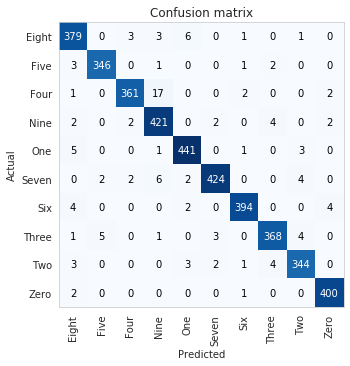

In [0]:
interpR.plot_confusion_matrix(figsize=(5,5))

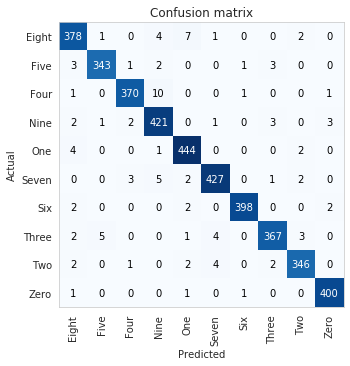

In [0]:
interpM.plot_confusion_matrix(figsize=(5,5))

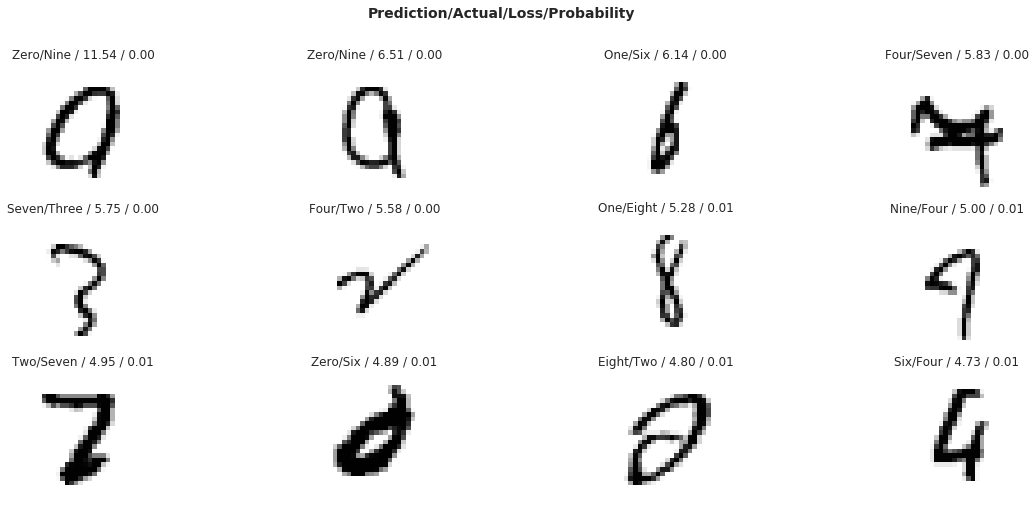

In [0]:
interpM.plot_top_losses(k=12,figsize=(20,8))

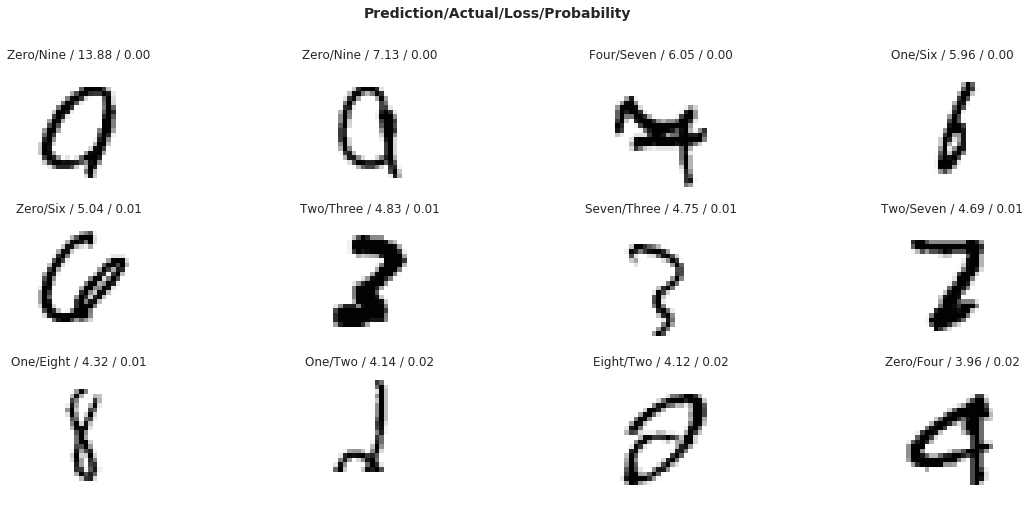

In [0]:
interpR.plot_top_losses(k=12,figsize=(20,8))